# Petition Maps

Several ways of looking at *that* petition data...

In [1]:
#I cheated in finding this URL
#I useed browser devtools Network view to see what loaded when
#I loaded https://petitionmap.unboxedconsulting.com/?petition=241584
petitiondata_url = 'https://petition.parliament.uk/petitions/241584.json'

In [2]:
import requests

petitiondata = requests.get(petitiondata_url).json()

In [4]:
#The genson package will create a schema from a JSON object
#The schema concisely represents the different attributes in the JSON object
# along with what type they are
from genson import SchemaBuilder

builder = SchemaBuilder()
builder.add_object(petitiondata)
builder.to_schema()

{'$schema': 'http://json-schema.org/schema#',
 'type': 'object',
 'properties': {'links': {'type': 'object',
   'properties': {'self': {'type': 'string'}},
   'required': ['self']},
  'data': {'type': 'object',
   'properties': {'type': {'type': 'string'},
    'id': {'type': 'integer'},
    'attributes': {'type': 'object',
     'properties': {'action': {'type': 'string'},
      'background': {'type': 'string'},
      'additional_details': {'type': 'string'},
      'state': {'type': 'string'},
      'signature_count': {'type': 'integer'},
      'created_at': {'type': 'string'},
      'updated_at': {'type': 'string'},
      'rejected_at': {'type': 'null'},
      'opened_at': {'type': 'string'},
      'closed_at': {'type': 'null'},
      'moderation_threshold_reached_at': {'type': 'string'},
      'response_threshold_reached_at': {'type': 'string'},
      'government_response_at': {'type': 'null'},
      'debate_threshold_reached_at': {'type': 'string'},
      'scheduled_debate_date': {'t

In [106]:
from pandas.io.json import json_normalize

df_country = json_normalize(petitiondata, ['data','attributes', 'signatures_by_country'])
df_country.head()

,code,name,signature_count
0,AF,Afghanistan,22
1,AL,Albania,20
2,DZ,Algeria,11
3,AS,American Samoa,4
4,AD,Andorra,40


In [107]:
df_constituency = json_normalize(petitiondata, ['data','attributes', 'signatures_by_constituency'])
df_constituency.sort_values('ons_code').head()

,mp,name,ons_code,signature_count
44,Leo Docherty MP,Aldershot,E14000530,6726
45,Wendy Morton MP,Aldridge-Brownhills,E14000531,2671
46,Sir Graham Brady MP,Altrincham and Sale West,E14000532,11941
48,Nigel Mills MP,Amber Valley,E14000533,3645
50,Rt Hon Nick Herbert MP,Arundel and South Downs,E14000534,11310


Alasdair Rae publishes shapefiles / geojson files containing constituency boundary files as well as electoral data ( http://ajrae.staff.shef.ac.uk/#resources).

We can load these directly into a `geopandas` dataframe.

In [108]:
electiondata_url = 'http://ajrae.staff.shef.ac.uk/wpc/geojson/uk_wpc_2018_with_data.geojson'

In [109]:
import geopandas

#Enable inline plotting
%matplotlib inline

gdf = geopandas.read_file(electiondata_url)

gdf.head()

,fid,objectid,PCONCODE15,PCONNAME15,WINNER15,SECOND15,ELECT15,MPFIRST15,MPLAST15,MPNAME15,...,Person ID,First name,Last name,Full Name,Party,Constituency,URI,majpct,alpha,geometry
0,1,1,E14000530,Aldershot,Con,Lab,72430,Gerald,Howarth,Gerald Howarth,...,25628,Leo,Docherty,Leo Docherty,Conservative,Aldershot,https://www.theyworkforyou.com/mp/25628/leo_do...,23.438,59.767,(POLYGON ((485408.1048668693 159918.6304395348...
1,2,2,E14000531,Aldridge-Brownhills,Con,Lab,60215,Wendy,Morton,Wendy Morton,...,25342,Wendy,Morton,Wendy Morton,Conservative,Aldridge-Brownhills,https://www.theyworkforyou.com/mp/25342/wendy_...,35.559,90.675,(POLYGON ((400715.9095222063 304324.8830029013...
2,3,3,E14000532,Altrincham and Sale West,Con,Lab,71511,Graham,Brady,Graham Brady,...,10062,Graham,Brady,Graham Brady,Conservative,Altrincham and Sale West,https://www.theyworkforyou.com/mp/10062/graham...,12.173,31.041,(POLYGON ((379104.0752267919 393145.7339323238...
3,4,4,E14000533,Amber Valley,Con,Lab,69510,Nigel,Mills,Nigel Mills,...,24965,Nigel,Mills,Nigel Mills,Conservative,Amber Valley,https://www.theyworkforyou.com/mp/24965/nigel_...,18.118,46.201,(POLYGON ((446572.0849578517 345372.8128860501...
4,5,5,E14000534,Arundel and South Downs,Con,UKIP,77242,Nick,Herbert,Nick Herbert,...,11377,Nick,Herbert,Nick Herbert,Conservative,Arundel and South Downs,https://www.theyworkforyou.com/mp/11377/nick_h...,39.636,101.072,(POLYGON ((503605.9211599359 108367.9490472795...


In [110]:
gdf.columns

Index(['fid', 'objectid', 'PCONCODE15', 'PCONNAME15', 'WINNER15', 'SECOND15',
       'ELECT15', 'MPFIRST15', 'MPLAST15', 'MPNAME15', 'ons_region_id',
       'constituency_name', 'county_name', 'region_name', 'country_name',
       'constituency_type', 'declaration_time', 'result', 'first_party',
       'second_party', 'electorate', 'valid_votes', 'invalid_votes',
       'majority', 'con', 'lab', 'ld', 'ukip', 'green', 'snp', 'pc', 'dup',
       'sf', 'sdlp', 'uup', 'alliance', 'other', 'other_winner', 'Person ID',
       'First name', 'Last name', 'Full Name', 'Party', 'Constituency', 'URI',
       'majpct', 'alpha', 'geometry'],
      dtype='object')

Generate a map to show parliamentray majorities:

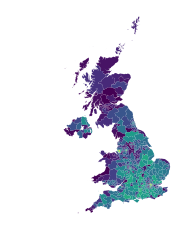

In [111]:
ax = gdf.plot(column='majority')
ax.axis('off');

We can also plot by party, though by default a default set of colour maps will be applied.

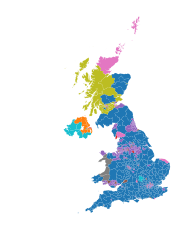

In [112]:
ax = gdf.plot(column='Party')
ax.axis('off');

What we really want to do is to be able to define color maps based on party...

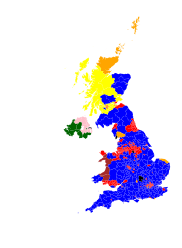

In [113]:
#Set up color maps by party
partycolors = {'Conservative':'blue', 
               'Labour':'red',
               'Independent':'black',
               'Liberal Democrat':'orange',
               'Labour/Co-operative':'red', 
               'Green':'green' , 
               'Speaker':'black',
               'DUP':'pink',
               'Sinn Féin':'darkgreen',
               'Scottish National Party':'yellow', 
               'Plaid Cymru':'brown'}

#The dataframe seems to assign items to categories based on the selected column sort order
#We can define a color map with a similar sorting
colors = [partycolors[k] for k in sorted(partycolors.keys())]

ax = gdf.plot(column='Party', cmap = ListedColormap(colors))
ax.axis('off');

## Merge in The Petition Data

We can merge the referendum data into the geodataframe using the constituency codes.

Before we do that, lets just check the data qulaity to make sure the code columns in each dataframe are consistent with each other.

In [114]:
#Check that the ons_code and PCONCODE15 columns containing matching values
#Find symmetric differences between the code columns in each dataframe
#They should match... i.e. there should be no differences
set(df_constituency['ons_code']) ^ set(gdf['PCONCODE15'])

set()

In [115]:
#An example of why mathcing on something like constituency names is fraught with risk...
#Find symmetric differences between constituency names
#That is, are there names in one set not in another?
set(df_constituency['name']) ^ set(gdf['PCONNAME15'])

{'Weston-Super-Mare', 'Weston-super-Mare', 'Ynys Mon', 'Ynys Môn'}

Now we can add the consituency count into the geodataframe.

The easiest way to do this is to set the index of each dataframe to the cosntituency code. The *geopandas* package will then automatically align rows if we just add the `signature_count` column from the `df_constituency` dataframe to the `gdf` dataframe.

In [116]:
gdf.set_index('PCONCODE15', inplace=True)
df_constituency.set_index('ons_code', inplace=True)
gdf['signature_count'] = df_constituency['signature_count']

## Merge in Referendum Data

The referendum did not report results by Parliamentary Constituency, but estimates of votes by constituency have been created.

I'll use the estimates created by Chris Hanretty as described [here](https://medium.com/@chrishanretty/final-estimates-of-the-leave-vote-or-areal-interpolation-and-the-uks-referendum-on-eu-membership-5490b6cab878) and published here: *“Areal interpolation and the UK’s referendum on EU membership”, Chris Hanretty, Journal Of Elections, Public Opinion And Parties, Online Early Access, http://dx.doi.org/10.1080/17457289.2017.1287081*

The data is published [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/S4DLWJ).

In some constituencies, actual results are known. A comparison between known and estimated results can be found in data collated by the House of Commons Library: [Brexit: votes by constituency](https://commonslibrary.parliament.uk/parliament-and-elections/elections-elections/brexit-votes-by-constituency/).

Unfortunately, we don't have estimates for the number of votes cast in each constituency.

In [117]:
import pandas as pd

referendum_url = 'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/S4DLWJ/TCBV7Q'
#The data is tab delimited
df_referendum = pd.read_csv(referendum_url, sep='\t')
df_referendum.head()


,PCON11CD,Constituency.Name,Leave.estimate,Remain.estimate,Leave.known,Remain.known
0,E14000530,Aldershot,0.580974,0.419026,NaN,NaN
1,E14000531,Aldridge-Brownhills,0.687228,0.312772,NaN,NaN
2,E14000532,Altrincham and Sale West,0.385878,0.614122,NaN,NaN
3,E14000533,Amber Valley,0.652991,0.347009,NaN,NaN
4,E14000534,Arundel and South Downs,0.497011,0.502989,NaN,NaN


In [118]:
#Number of electors by constituency in 2016
electorate_url = 'https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/elections/electoralregistration/datasets/electoralstatisticsforuk/2016unformatted/elec5dt2unformattedelectoralstatisticsuk2016.xls'
fname = 'electorate.xls'
!wget -O $fname  $electorate_url

--2019-03-25 12:13:41--  https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/elections/electoralregistration/datasets/electoralstatisticsforuk/2016unformatted/elec5dt2unformattedelectoralstatisticsuk2016.xls
Resolving www.ons.gov.uk (www.ons.gov.uk)... 104.20.61.76, 104.20.60.76, 2606:4700:10::6814:3d4c, ...
Connecting to www.ons.gov.uk (www.ons.gov.uk)|104.20.61.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.ms-excel]
Saving to: ‘electorate.xls’

electorate.xls          [ <=>                ] 257.50K  --.-KB/s    in 0.04s   

2019-03-25 12:13:41 (7.06 MB/s) - ‘electorate.xls’ saved [263680]



In [119]:
#See what the sheets are in the file
xl = pd.ExcelFile(fname)

xl.sheet_names 

['Contents',
 'Terms and conditions',
 'Notes and definitions',
 'Table 1',
 'Table 2 ',
 'Related publications ']

In [120]:
#Table name does have the whitespace in it...
df_electorate = pd.read_excel(fname, sheetname='Table 2 ')
df_electorate.head()

/srv/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Code,Parliamentary constituency,Constituency type,Total electors 2015,Total electors 2016,Attainers 2015,Attainers 2016
0,K02000001,United Kingdom,.,44722004,45766429,281535,344734
1,E92000001,England,.,37399942,38386864,239019,284522
2,W92000004,Wales,.,2181841,2243919,12339,13651
3,S92000003,Scotland,.,3896852,3929963,24827,41561
4,N92000002,Northern Ireland,.,1243369,1205683,5350,5000


In [121]:
turnout = 0.72

The methodology all goes a bit approximate from now on...

First, lets get the electorate size by constituency in 2016. The ONS publish the data [here](https://www.ons.gov.uk/peoplepopulationandcommunity/elections/electoralregistration/datasets/electoralstatisticsforuk).

In [122]:
df_referendum.set_index('PCON11CD', inplace=True)
df_electorate.set_index('Code', inplace=True)

df_referendum['electorate'] = pd.merge(df_referendum, df_electorate, left_index=True, right_index=True)['Total electors 2016']

df_referendum.head()

,Constituency.Name,Leave.estimate,Remain.estimate,Leave.known,Remain.known,electorate
PCON11CD,,,,,,
E14000530,Aldershot,0.580974,0.419026,NaN,NaN,72769
E14000531,Aldridge-Brownhills,0.687228,0.312772,NaN,NaN,59296
E14000532,Altrincham and Sale West,0.385878,0.614122,NaN,NaN,71058
E14000533,Amber Valley,0.652991,0.347009,NaN,NaN,66639
E14000534,Arundel and South Downs,0.497011,0.502989,NaN,NaN,78196


Let's guesstimate the votes cast. Assume a consistent turnout and then estimate votes cast based on the turnout and the electorate.

In [123]:
#Estimated turnout - use the saem figure for all constituencies
#This is all very rule of thumb...
turnout = 0.72

df_referendum['leave votes'] = (turnout * df_referendum['electorate'] * df_referendum['Leave.estimate']).astype(int)
df_referendum['remain votes'] = (turnout * df_referendum['electorate'] * df_referendum['Remain.estimate']).astype(int)

df_referendum.head()

,Constituency.Name,Leave.estimate,Remain.estimate,Leave.known,Remain.known,electorate,leave votes,remain votes
PCON11CD,,,,,,,,
E14000530,Aldershot,0.580974,0.419026,NaN,NaN,72769,30439,21954
E14000531,Aldridge-Brownhills,0.687228,0.312772,NaN,NaN,59296,29339,13353
E14000532,Altrincham and Sale West,0.385878,0.614122,NaN,NaN,71058,19742,31419
E14000533,Amber Valley,0.652991,0.347009,NaN,NaN,66639,31330,16649
E14000534,Arundel and South Downs,0.497011,0.502989,NaN,NaN,78196,27982,28318


In [175]:
df_referendum['referendum majority'] = (df_referendum['leave votes'] - df_referendum['remain votes']).abs()
#plotly express doesn't see boolean as a categorical. So make it a string.
df_referendum['leave'] = (df_referendum['leave votes'] > df_referendum['remain votes']).astype(str)

df_referendum.head()

,Constituency.Name,Leave.estimate,Remain.estimate,Leave.known,Remain.known,electorate,leave votes,remain votes,referendum majority,leave
PCON11CD,,,,,,,,,,
E14000530,Aldershot,0.580974,0.419026,NaN,NaN,72769,30439,21954,8485,True
E14000531,Aldridge-Brownhills,0.687228,0.312772,NaN,NaN,59296,29339,13353,15986,True
E14000532,Altrincham and Sale West,0.385878,0.614122,NaN,NaN,71058,19742,31419,11677,False
E14000533,Amber Valley,0.652991,0.347009,NaN,NaN,66639,31330,16649,14681,True
E14000534,Arundel and South Downs,0.497011,0.502989,NaN,NaN,78196,27982,28318,336,False


## Charting the Referendum Counts

On social media, there has been a lot of commentary comparing the number of people signing the petition with the majhority in the constituency. There's a lot of apples and pears there, but we can maybe use this as an indicator of sentiment about how safe a seat is compared to the number of people expressing a view about revoking article 50 in each constituency.

So how about we plot the log of the number of signatories to the petition divided by the majority vote (either way) at the referendum over the log of the number of signatories to the petition divided by the majority at the general election.

Then we can read the quadrants as:

- *bottom left*: safe seat, convinced
- *top left*: safe seat, unconvinced
- *top right*: unsafe seat, unconvinced
- *bottom right*: unsafe seat, convinced

In [176]:
df_dodgystats = pd.merge(gdf, df_referendum[['referendum majority','leave']], left_index=True, right_index=True)

df_dodgystats.head()

,fid,objectid,PCONNAME15,WINNER15,SECOND15,ELECT15,MPFIRST15,MPLAST15,MPNAME15,ons_region_id,...,Full Name,Party,Constituency,URI,majpct,alpha,geometry,signature_count,referendum majority,leave
E14000530,1,1,Aldershot,Con,Lab,72430,Gerald,Howarth,Gerald Howarth,E12000008,...,Leo Docherty,Conservative,Aldershot,https://www.theyworkforyou.com/mp/25628/leo_do...,23.438,59.767,(POLYGON ((485408.1048668693 159918.6304395348...,6726,8485,True
E14000531,2,2,Aldridge-Brownhills,Con,Lab,60215,Wendy,Morton,Wendy Morton,E12000005,...,Wendy Morton,Conservative,Aldridge-Brownhills,https://www.theyworkforyou.com/mp/25342/wendy_...,35.559,90.675,(POLYGON ((400715.9095222063 304324.8830029013...,2671,15986,True
E14000532,3,3,Altrincham and Sale West,Con,Lab,71511,Graham,Brady,Graham Brady,E12000002,...,Graham Brady,Conservative,Altrincham and Sale West,https://www.theyworkforyou.com/mp/10062/graham...,12.173,31.041,(POLYGON ((379104.0752267919 393145.7339323238...,11941,11677,False
E14000533,4,4,Amber Valley,Con,Lab,69510,Nigel,Mills,Nigel Mills,E12000004,...,Nigel Mills,Conservative,Amber Valley,https://www.theyworkforyou.com/mp/24965/nigel_...,18.118,46.201,(POLYGON ((446572.0849578517 345372.8128860501...,3645,14681,True
E14000534,5,5,Arundel and South Downs,Con,UKIP,77242,Nick,Herbert,Nick Herbert,E12000008,...,Nick Herbert,Conservative,Arundel and South Downs,https://www.theyworkforyou.com/mp/11377/nick_h...,39.636,101.072,(POLYGON ((503605.9211599359 108367.9490472795...,11310,336,False


In [177]:
import numpy as np

df_dodgystats['safety'] = np.log10(df_dodgystats['signature_count'] / df_dodgystats['majority'])
df_dodgystats['confidence'] = np.log10(df_dodgystats['signature_count'] / df_dodgystats['referendum majority'])

df_dodgystats.head()

,fid,objectid,PCONNAME15,WINNER15,SECOND15,ELECT15,MPFIRST15,MPLAST15,MPNAME15,ons_region_id,...,Constituency,URI,majpct,alpha,geometry,signature_count,referendum majority,leave,safety,confidence
E14000530,1,1,Aldershot,Con,Lab,72430,Gerald,Howarth,Gerald Howarth,E12000008,...,Aldershot,https://www.theyworkforyou.com/mp/25628/leo_do...,23.438,59.767,(POLYGON ((485408.1048668693 159918.6304395348...,6726,8485,True,-0.231920,-0.100895
E14000531,2,2,Aldridge-Brownhills,Con,Lab,60215,Wendy,Morton,Wendy Morton,E12000005,...,Aldridge-Brownhills,https://www.theyworkforyou.com/mp/25342/wendy_...,35.559,90.675,(POLYGON ((400715.9095222063 304324.8830029013...,2671,15986,True,-0.728875,-0.777066
E14000532,3,3,Altrincham and Sale West,Con,Lab,71511,Graham,Brady,Graham Brady,E12000002,...,Altrincham and Sale West,https://www.theyworkforyou.com/mp/10062/graham...,12.173,31.041,(POLYGON ((379104.0752267919 393145.7339323238...,11941,11677,False,0.269100,0.009709
E14000533,4,4,Amber Valley,Con,Lab,69510,Nigel,Mills,Nigel Mills,E12000004,...,Amber Valley,https://www.theyworkforyou.com/mp/24965/nigel_...,18.118,46.201,(POLYGON ((446572.0849578517 345372.8128860501...,3645,14681,True,-0.357381,-0.605058
E14000534,5,5,Arundel and South Downs,Con,UKIP,77242,Nick,Herbert,Nick Herbert,E12000008,...,Arundel and South Downs,https://www.theyworkforyou.com/mp/11377/nick_h...,39.636,101.072,(POLYGON ((503605.9211599359 108367.9490472795...,11310,336,False,-0.324626,1.527123


Create a column that summarises info we want in the tooltip

In [194]:
df_dodgystats['header'] = df_dodgystats[['PCONNAME15', 'WINNER15', 'majority',
                                         'referendum majority', 'signature_count']].astype(str).apply(lambda x: '<br>'.join(x), axis=1)



df_dodgystats['header'] = df_dodgystats[['PCONNAME15', 'WINNER15']].astype(str).apply(lambda x: '<br>'.join(x), axis=1)
df_dodgystats['header'] = df_dodgystats['header'] + '<br>Majority:'
df_dodgystats['header'] = df_dodgystats[['header', 'majority']].astype(str).apply(lambda x: ' '.join(x), axis=1)
df_dodgystats['header'] = df_dodgystats['header'] + '<br>Referendum Majority:'
df_dodgystats['header'] = df_dodgystats[['header', 'referendum majority']].astype(str).apply(lambda x: ' '.join(x), axis=1)
df_dodgystats['header'] = df_dodgystats['header'] + '<br>Petition Signatures:'
df_dodgystats['header'] = df_dodgystats[['header', 'signature_count']].astype(str).apply(lambda x: ' '.join(x), axis=1)



In [198]:
import plotly_express as px

px.scatter(df_dodgystats, x='safety', y='confidence', color='leave', hover_name='header',
           title='UK Petition Scatter: Referendum Confidence vs Parliamentary Seat Saftey')